# Forecasting

In this assignment, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

Learning Objectives:

- Decompose time series into autocorrelation, seasonality, trend, and noise. 
- Explain the effects of exponential smoothing models and differentiate them from other models.
- Apply and evaluate the results of an autoregressive model. 
- Apply and evaluate the results of a moving average model. 
- Apply and evaluate the results of an autoregressive integrated moving average model.
- Apply and evaluate the results of ARIMA model for forecasting (time series prediction).


In [ ]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

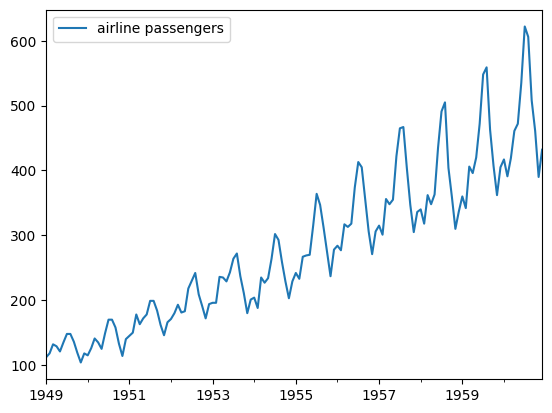

In [3]:
df = pd.read_csv('./airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq='MS')

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

Question 1.1: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

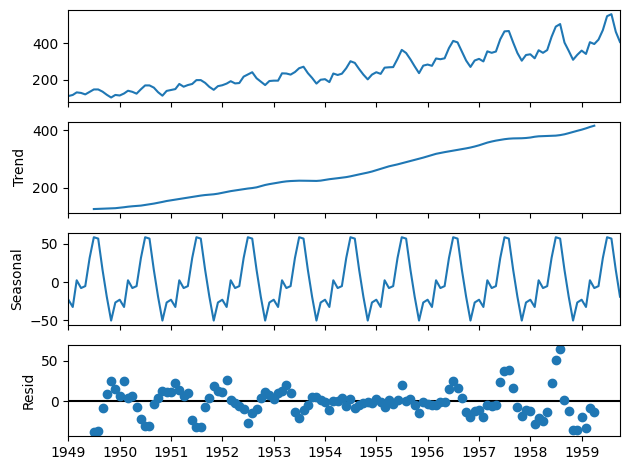

In [4]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train, model='additive', period=12)
result.plot()
pyplot.show()

Question 1.2: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

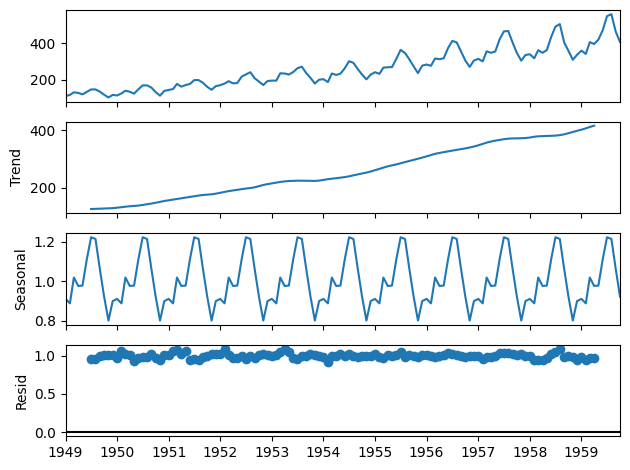

In [5]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train, model='multiplicative', period=12)
result.plot()
pyplot.show()

## Summary

Between additive and multiplicative decomposition, the multiplicative decomposition makes more sense in this dataset. The trend and seasonality components are more stable in the multiplicative decomposition, which should allow for modelling the residuals with a constant.

----------

Question 2.1: Apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

rmse:77.93050298629993
mae:60.642857142857146


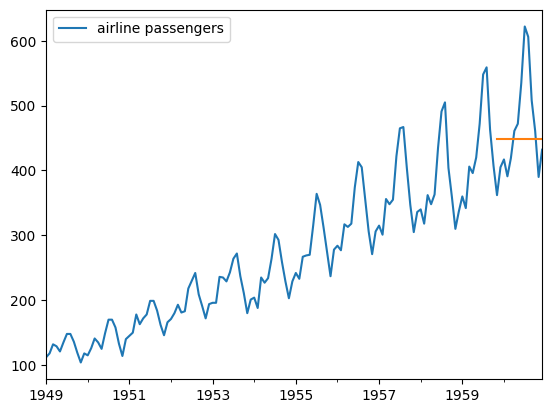

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model = SimpleExpSmoothing(train).fit(smoothing_level=.2)
forecast = model.predict(start=test.index[0], end=test.index[-1])
df.plot()
forecast.plot()

print("rmse:" + str(sqrt(mean_squared_error(test, forecast))))
print("mae:" + str(mean_absolute_error(test, forecast)))

----------

Question 2.2: Apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

rmse:15.050748835326935
mae:10.114792470368306


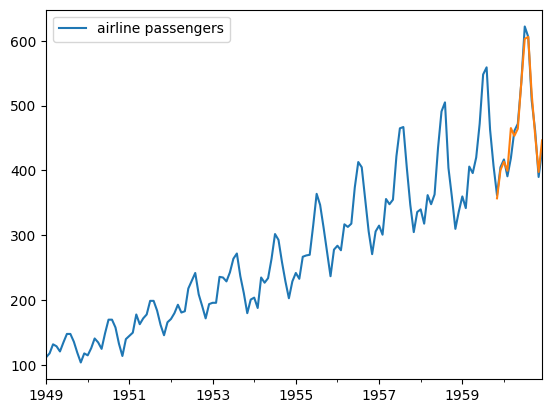

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(train, trend="mul", seasonal="mul").fit(smoothing_level=.67)
forecast = model.predict(start=test.index[0], end=test.index[-1])
df.plot()
forecast.plot()

print("rmse:" + str(sqrt(mean_squared_error(test, forecast))))
print("mae:" + str(mean_absolute_error(test, forecast)))

-----

Question 3.1: Apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

rmse:19.984609967048556
mae:15.737007636315314


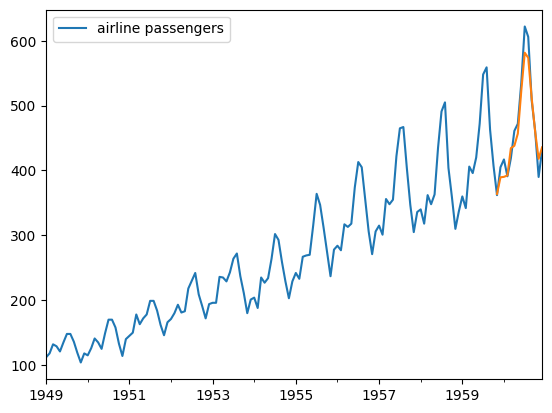

In [79]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train, lags=[1, 11], seasonal=True, trend="t").fit()
forecast = model.predict(start=test.index[0], end=test.index[-1])
df.plot()
forecast.plot()

print("rmse:" + str(sqrt(mean_squared_error(test, forecast))))
print("mae:" + str(mean_absolute_error(test, forecast)))

----------

Question 3.2: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

rmse:26.56334367002133
mae:23.681723391849953


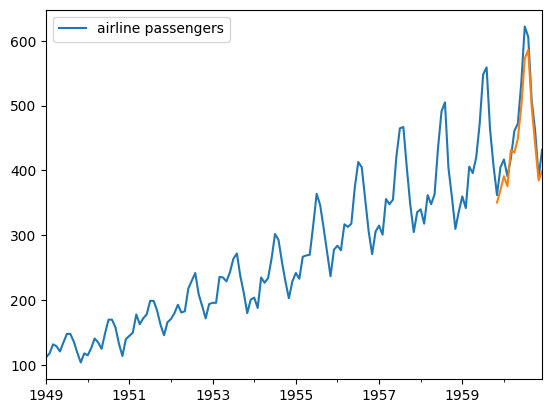

In [110]:
from statsmodels.tsa.arima.model import ARIMA

# fit model - The new version of statsmodels has a different way of fitting the model, there is no ARMA anymore!
model = ARIMA(train, order=((1, 11, 12), 0, (1,2,6, 12)), trend="t").fit()
forecast = model.predict(start=test.index[0], end=test.index[-1])
df.plot()
forecast.plot()

print("rmse:" + str(sqrt(mean_squared_error(test, forecast))))
print("mae:" + str(mean_absolute_error(test, forecast)))

----------

Questio 4.1: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# fit model


# make prediction


#print RMSE and MAE

----------

Question 4.2: Apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

rmse:16.025715830507593
mae:11.82015225093124


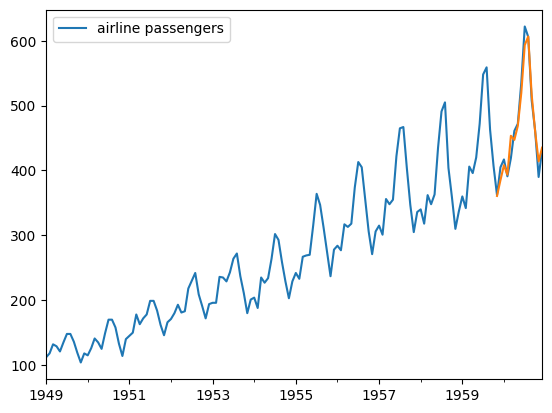

In [129]:
from statsmodels.tsa.arima.model import ARIMA

# fit model - The new version of statsmodels has a different way of fitting the model, there is no ARMA anymore!
model = ARIMA(train, order=((1, 12), 1, (1, 11)), trend="t").fit()
forecast = model.predict(start=test.index[0], end=test.index[-1])
df.plot()
forecast.plot()

print("rmse:" + str(sqrt(mean_squared_error(test, forecast))))
print("mae:" + str(mean_absolute_error(test, forecast)))

Question 5: After running through various time series models, summarize your findings. 

In [ ]:
The best model that I was able to find was the Exponential smoothing, that included the trend, as well as 
the seasonal component, especially when the trend was multiplicative and the seasonal component was also multiplicative. 
It was a little bit better than the ARIMA model.

Question 6. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

In [ ]:
I had done some work on time series forecasting before, but I had never used the statsmodels library. I used a lot of gretl UI,
so coming to the new library was very interesting experience. I am a little surprised that the ARIMA model turned out to be 
not as effective as a relatively simple exponential smoothing model. I think that the ARIMA model is a little bit more complex fo this data.
Also, the data is pretty... old. If I were to guess, I would say that the amount of passengers got more stable over time, so the
regular time series models might not be subject to trend, and the seasonality effects also diminished over time.